# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [53]:
#Import your libraries

import numpy as np
import pandas as pd
import seaborn as sns


%matplotlib inline
import matplotlib.pyplot as plt

# Introduction

In this lab, we will use two datasets. Both datasets contain variables that describe apps from the Google Play Store. We will use our knowledge in feature extraction to process these datasets and prepare them for the use of a ML algorithm.

# Challenge 1 - Loading and Extracting Features from the First Dataset

#### In this challenge, our goals are: 

* Exploring the dataset.
* Identify the columns with missing values.
* Either replacing the missing values in each column or drop the columns.
* Conver each column to the appropriate type.

#### The first dataset contains different information describing the apps. 

Load the dataset into the variable `google_play` in the cell below. The dataset is in the file `googleplaystore.csv`

In [54]:
# Your code here:

google_play = pd.read_csv(r'C:\Users\Administrateur\Ironhack\LAB\DAFT_212\module_3\Lab_5_Feature-Extraction\data/googleplaystore.csv')
google_play

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


#### Examine all variables and their types in the following cell

In [55]:
# Your code here:
google_play.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### Since this dataset only contains one numeric column, let's skip the `describe()` function and look at the first 5 rows using the `head()` function

In [56]:
# Your code here:
google_play.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### We can see that there are a few columns that could be coerced to numeric.

Start with the reviews column. We can evaluate what value is causing this column to be of object type finding the non-numeric values in this column. To do this, we recall the `to_numeric()` function. With this function, we are able to coerce all non-numeric data to null. We can then use the `isnull()` function to subset our dataframe using the True/False column that this function generates.

In the cell below, transform the Reviews column to numeric and assign this new column to the variable `Reviews_numeric`. Make sure to coerce the errors.

In [57]:
# Your code here:

Reviews_numeric=google_play['Reviews']
Reviews_numeric

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10841, dtype: object

Next, create a column containing True/False values using the `isnull()` function. Assign this column to the `Reviews_isnull` variable.

In [58]:
# Your code here:
Reviews_isnull=Reviews_numeric.isnull()
Reviews_isnull

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
Name: Reviews, Length: 10841, dtype: bool

Finally, subset the `google_play` with `Reviews_isnull`. This should give you all the rows that contain non-numeric characters.

Your output should look like:

![Reviews_bool.png](reviews-bool.png)

In [59]:
# Your code here:


#### We see that Google Play is using a shorthand for millions. 

Let's write a function to transform this data.

Steps:

1. Create a function that returns the correct numeric values of *Reviews*.
1. Define a test string with `M` in the last character.
1. Test your function with the test string. Make sure your function works correctly. If not, modify your functions and test again.

In [60]:
# Your code here

def convert_string_to_numeric(s):
    """
    Convert a string value to numeric. If the last character of the string is `M`, obtain the 
    numeric part of the string, multiply it with 1,000,000, then return the result. Otherwise, 
    convert the string to numeric value and return the result.
    
    Args:
        s: The Reviews score in string format.

    Returns:
        The correct numeric value of the Reviews score.
    """
    if s.endswith('M'):
        return float(s[:-1]) * 1000000
    return float(s)

test_string = '4.0M'
convert_string_to_numeric(test_string)

4000000.0

The last step is to apply the function to the `Reviews` column in the following cell:

In [61]:
google_play['Reviews'] = google_play['Reviews'].apply(convert_string_to_numeric)
google_play['Reviews']

0           159.0
1           967.0
2         87510.0
3        215644.0
4           967.0
           ...   
10836        38.0
10837         4.0
10838         3.0
10839       114.0
10840    398307.0
Name: Reviews, Length: 10841, dtype: float64

In [62]:
google_play.iloc[10472, :]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                         3000000.0
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

Check the non-numeric `Reviews` row again. It should have been fixed now and you should see:

![Reviews_bool_fixed.png](reviews-bool-fixed.png)

In [63]:
# Your code here
google_play.iloc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                         3000000.0
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

Also check the variable types of `google_play`. The `Reviews` column should be a `float64` type now.

In [64]:
# Your code here:
google_play.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### The next column we will look at is `Size`. We start by looking at all unique values in `Size`:

*Hint: use `unique()` ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.unique.html))*.

In [65]:
# Your code here:
google_play.Size.unique()
google_play.Size.value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
429k                     1
200k                     1
460k                     1
728k                     1
619k                     1
Name: Size, Length: 462, dtype: int64

You should have seen lots of unique values of the app sizes.

#### While we can convert most of the `Size` values to numeric in the same way we converted the `Reviews` values, there is one value that is impossible to convert.

What is that badass value? Enter it in the next cell and calculate the proportion of its occurence to the total number of records of `google_play`.

In [66]:
# Your code here:
google_play['Size'][google_play['Size']== 'Varies with device'].value_counts()/len(google_play['Size'])*100

Varies with device    15.635089
Name: Size, dtype: float64

#### While this column may be useful for other types of analysis, we opt to drop it from our dataset. 

There are two reasons. First, the majority of the data are ordinal but a sizeable proportion are missing because we cannot convert them to numerical values. Ordinal data are both numerical and categorical, and they usually can be ranked (e.g. 82k is smaller than 91M). In contrast, non-ordinal categorical data such as blood type and eye color cannot be ranked. The second reason is as a categorical column, it has too many unique values to produce meaningful insights. Therefore, in our case the simplest strategy would be to drop the column.

Drop the column in the cell below (use `inplace=True`)

In [67]:
# Your code here:
google_play.drop(['Size'], axis=1, inplace=True)
google_play.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### Now let's look at how many missing values are in each column. 

This will give us an idea of whether we should come up with a missing data strategy or give up on the column all together. In the next column, find the number of missing values in each column: 

*Hint: use the `isna()` and `sum()` functions.*

In [68]:
# Your code here:
google_play.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

You should find the column with the most missing values is now `Rating`.

#### What is the proportion of the missing values in `Rating` to the total number of records?

Enter your answer in the cell below.

In [69]:
# Your code here:
google_play['Rating'].isna().sum()/len(google_play['Rating'])*100

13.596531685268886

A sizeable proportion of the `Rating` column is missing. A few other columns also contain several missing values.

#### We opt to preserve these columns and remove the rows containing missing data.

In particular, we don't want to drop the `Rating` column because:

* It is one of the most important columns in our dataset. 

* Since the dataset is not a time series, the loss of these rows will not have a negative impact on our ability to analyze the data. It will, however, cause us to lose some meaningful observations. But the loss is limited compared to the gain we receive by preserving these columns.

In the cell below, remove all rows containing at least one missing value. Use the `dropna()` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)). Assign the new dataframe to the variable `google_missing_removed`.

In [70]:
# Your code here:
google_missing_removed=google_play.dropna()
google_missing_removed

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7.0,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [71]:
google_missing_removed.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

From now on, we use the `google_missing_removed` variable instead of `google_play`.

#### Next, we look at the `Last Updated` column.

The `Last Updated` column seems to contain a date, though it is classified as an object type. Let's convert this column using the `pd.to_datetime` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)).

In [72]:
# Your code here:
google_missing_removed['Last Updated'].value_counts()

August 3, 2018       319
August 2, 2018       284
July 31, 2018        279
August 1, 2018       275
July 30, 2018        199
                    ... 
July 19, 2015          1
March 16, 2015         1
July 6, 2014           1
December 17, 2015      1
March 23, 2014         1
Name: Last Updated, Length: 1299, dtype: int64

In [73]:
import datetime
google_missing_removed['Last Updated']=pd.to_datetime(google_missing_removed['Last Updated'])
google_missing_removed['Last Updated'].value_counts()

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_13212/3567049540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_missing_removed['Last Updated']=pd.to_datetime(google_missing_removed['Last Updated'])


2018-08-03    319
2018-08-02    284
2018-07-31    279
2018-08-01    275
2018-07-30    199
             ... 
2015-07-19      1
2015-03-16      1
2014-07-06      1
2015-12-17      1
2014-03-23      1
Name: Last Updated, Length: 1299, dtype: int64

#### The last column we will transform is `Price`. 

We start by looking at the unique values of this column.

In [74]:
# Your code here:
google_missing_removed['Price'].value_counts()

0          8715
$2.99       114
$0.99       106
$4.99        70
$1.99        59
           ... 
$1.29         1
$299.99       1
$379.99       1
$37.99        1
$1.20         1
Name: Price, Length: 73, dtype: int64

Since all prices are ordinal data without exceptions, we can tranform this column by removing the dollar sign and converting to numeric. We can create a new column called `Price Numerical` and drop the original column.

We will achieve our goal in three steps. Follow the instructions of each step below.

#### First we remove the dollar sign. Do this in the next cell by applying the `str.replace` function to the column to replace `$` with an empty string (`''`).

In [75]:
# Your code here:
google_missing_removed['Price Numerical'] = google_missing_removed['Price'].str.replace('$', '')
google_missing_removed

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_13212/3297145266.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  google_missing_removed['Price Numerical'] = google_missing_removed['Price'].str.replace('$', '')
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_13212/3297145266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_missing_removed['Price Numerical'] = google_missing_removed['Price'].str.replace('$', '')


,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price Numerical
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7.0,500+,Free,0,Everyone,Education,2017-06-18,1.0.0,4.1 and up,0
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,"5,000+",Free,0,Everyone,Education,2017-07-25,1.48,4.1 and up,0
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,100+,Free,0,Everyone,Education,2018-07-06,1.0,4.1 and up,0
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,"1,000+",Free,0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,0


#### Second step, coerce the `Price Numerical` column to numeric.

In [76]:
# Your code here:
google_missing_removed['Price Numerical']=google_missing_removed['Price Numerical'].apply(pd.to_numeric, errors='coerce')
google_missing_removed['Price Numerical']

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_13212/1720160370.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_missing_removed['Price Numerical']=google_missing_removed['Price Numerical'].apply(pd.to_numeric, errors='coerce')


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10834    0.0
10836    0.0
10837    0.0
10839    0.0
10840    0.0
Name: Price Numerical, Length: 9360, dtype: float64

**Finally, drop the original `Price` column.**

In [77]:
# Your code here:
google_missing_removed.drop(['Price'], axis=1, inplace=True)

C:\Users\Administrateur\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Now check the variable types of `google_missing_removed`. Make sure:

* `Size` and `Price` columns have been removed.
* `Rating`, `Reviews`, and `Price Numerical` have the type of `float64`.
* `Last Updated` has the type of `datetime64`.

In [78]:
# Your code here
google_missing_removed.dtypes

App                        object
Category                   object
Rating                    float64
Reviews                   float64
Installs                   object
Type                       object
Content Rating             object
Genres                     object
Last Updated       datetime64[ns]
Current Ver                object
Android Ver                object
Price Numerical           float64
dtype: object

# Challenge 2 - Loading and Extracting Features from the Second Dataset

Load the second dataset to the variable `google_reviews`. The data is in the file `googleplaystore_user_reviews.csv`.

In [79]:
# Your code here:

google_review = pd.read_csv(r'C:\Users\Administrateur\Ironhack\LAB\DAFT_212\module_3\Lab_5_Feature-Extraction\data/googleplaystore_user_reviews.csv')


#### This dataset contains the top 100 reviews for each app. 

Let's examine this dataset using the `head` function

In [80]:
# Your code here
google_review.head(100)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
...,...,...,...,...,...
95,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325000,0.475000
96,10 Best Foods for You,Love app. It gives way good idea I buying stor...,Positive,0.400000,0.400000
97,10 Best Foods for You,Great Its really best unique provides detailed...,Positive,0.579167,0.683333
98,10 Best Foods for You,Nothing special! Could find anything useful!,Positive,0.410714,0.285714


#### The main piece of information we would like to extract from this dataset is the proportion of positive reviews of each app. 

Columns like `Sentiment_Polarity` and `Sentiment_Subjectivity` are not to our interests because we have no clue how to use them. We do not care about `Translated_Review` because natural language processing is too complex for us at present (in fact the `Sentiment`, `Sentiment_Polarity`, and `Sentiment_Subjectivity` columns are derived from `Translated_Review` the data scientists). 

What we care about in this challenge is `Sentiment`. To be more precise, we care about **what is the proportion of *Positive* sentiment of each app**. This will require us to aggregate the `Sentiment` data by `App` in order to calculate the proportions.

Now that you are clear about what we are trying to achieve, follow the steps below that will walk you through towards our goal.

#### Our first step will be to remove all rows with missing sentiment. 

In the next cell, drop all rows with missing data using the `dropna()` function and assign this new dataframe to `review_missing_removed`.

In [81]:
# Your code here:
review_missing_removed=google_review.dropna()
review_missing_removed

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


#### Now, use the `value_counts()` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)) to get a sense on how many apps are in this dataset and their review counts.

In [82]:
# Your code here:
review_missing_removed.App.value_counts()

Bowmasters                        312
Helix Jump                        273
Angry Birds Classic               273
Calorie Counter - MyFitnessPal    254
Duolingo: Learn Languages Free    240
                                 ... 
Draw a Stickman: EPIC 2             1
HD Camera                           1
Draw In                             1
Draw A Stickman                     1
Best Fiends - Free Puzzle Game      1
Name: App, Length: 865, dtype: int64

#### Now the tough part comes. Let's plan how we will achieve our goal:

1. We will count the number of reviews that contain *Positive* in the `Sentiment` column.

1. We will create a new dataframe to contain the `App` name, the number of positive reviews, and the total number of reviews of each app.

1. We will then loop the new dataframe to calculate the postivie review portion of each app.

#### Step 1: Count the number of positive reviews.

In the following cell, write a function that takes a column and returns the number of times *Positive* appears in the column. 

*Hint: One option is to use the `np.where()` function ([documentation](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.where.html)).*

In [83]:
# Your code below

def positive_function(x):
    """
    Count how many times the string `Positive` appears in a column (exact string match).
    
    Args:
        x: data column
    
    Returns:
        The number of occurrences of `Positive` in the column data.
    """
    return sum(np.where(x == 'Positive', 1, 0))
positive_function(review_missing_removed.Sentiment)

23998

In [84]:
review_missing_removed['Sentiment'][review_missing_removed['Sentiment']=='Positive'].value_counts()

Positive    23998
Name: Sentiment, dtype: int64

#### Step 2: Create a new dataframe to contain the `App` name, the number of positive reviews, and the total number of reviews of each app

We will group `review_missing_removed` by the `App` column, then aggregate the grouped dataframe on the number of positive reviews and the total review counts of each app. The result will be assigned to a new variable `google_agg`. Here is the ([documentation on how to achieve it](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)). Take a moment or two to read the documentation and google examples because it is pretty complex.

When you obtain `google_agg`, check its values to make sure it has an `App` column as its index as well as a `Positive` column and a `Total` column. Your output should look like:

![Positive Reviews Agg](positive-review-agg.png)

*Hint: Use `positive_function` you created earlier as part of the param passed to the `agg()` function in order to aggregate the number of positive reviews.*

#### Bonus:

As of Pandas v0.23.4, you may opt to supply an array or an object to `agg()`. If you use the array param, you'll need to rename the columns so that their names are `Positive` and `Total`. Using the object param will allow you to create the aggregated columns with the desirable names without renaming them. However, you will probably encounter a warning indicating supplying an object to `agg()` will become outdated. It's up to you which way you will use. Try both ways out. Any way is fine as long as it works.

In [85]:
google_agg = review_missing_removed[['App','Sentiment']].groupby('App').agg([positive_function,len])
google_agg.columns=['Positive','Total']
google_agg

,Positive,Total
App,,
10 Best Foods for You,162,194
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,31,40
11st,23,39
1800 Contacts - Lens Store,64,80
1LINE – One Line with One Touch,27,38
...,...,...
Hotels.com: Book Hotel Rooms & Find Vacation Deals,39,68
Hotspot Shield Free VPN Proxy & Wi-Fi Security,17,34
Hotstar,14,32


Print the first 5 rows of `google_agg` to check it.

In [86]:
# Your code here
google_agg.head(5)

,Positive,Total
App,,
10 Best Foods for You,162,194
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,31,40
11st,23,39
1800 Contacts - Lens Store,64,80
1LINE – One Line with One Touch,27,38


#### Add a derived column to `google_agg` that is the ratio of the `Positive` and the `Total` columns. Call this column `Positive Ratio`. 

Make sure to account for the case where the denominator is zero using the `np.where()` function.

In [87]:
# Your code here:
google_agg['Positive Ratio']=np.where(google_agg['Total']!=0, google_agg['Positive']/google_agg['Total'], 0)
google_agg

,Positive,Total,Positive Ratio
App,,,
10 Best Foods for You,162,194,0.835052
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,31,40,0.775000
11st,23,39,0.589744
1800 Contacts - Lens Store,64,80,0.800000
1LINE – One Line with One Touch,27,38,0.710526
...,...,...,...
Hotels.com: Book Hotel Rooms & Find Vacation Deals,39,68,0.573529
Hotspot Shield Free VPN Proxy & Wi-Fi Security,17,34,0.500000
Hotstar,14,32,0.437500


#### Now drop the `Positive` and `Total` columns. Do this with `inplace=True`.

In [88]:
# Your code here:
google_agg.drop(['Positive','Total'], axis = 1, inplace = True)

Print the first 5 rows of `google_agg`. Your output should look like:

![Positive Reviews Agg](positive-review-ratio.png)

In [89]:
# Your code here:
google_agg.head(5)

,Positive Ratio
App,
10 Best Foods for You,0.835052
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.775000
11st,0.589744
1800 Contacts - Lens Store,0.800000
1LINE – One Line with One Touch,0.710526


# Challenge 3 - Join the Dataframes

In this part of the lab, we will join the two dataframes and obtain a dataframe that contains features we can use in our ML algorithm.

In the next cell, join the `google_missing_removed` dataframe with the `google_agg` dataframe on the `App` column. Assign this dataframe to the variable `google`.

In [90]:
# Your code here:
google=pd.merge(google_missing_removed, google_agg, on="App")

#### Let's look at the final result using the `head()` function. Your final product should look like:

![Final Product](google-final-head.png)

In [91]:
# Your code here:
google.head()

,App,Category,Rating,Reviews,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price Numerical,Positive Ratio
0,Coloring book moana,ART_AND_DESIGN,3.9,967.0,"500,000+",Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,0.0,0.590909
1,Coloring book moana,FAMILY,3.9,974.0,"500,000+",Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,0.0,0.590909
2,Garden Coloring Book,ART_AND_DESIGN,4.4,13791.0,"1,000,000+",Free,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up,0.0,0.711111
3,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216.0,"5,000,000+",Free,Everyone,Art & Design,2018-08-03,2.2.5,4.0.3 and up,0.0,1.000000
4,Boys Photo Editor - Six Pack & Men's Suit,ART_AND_DESIGN,4.1,654.0,"100,000+",Free,Everyone,Art & Design,2018-03-20,1.1,4.0.3 and up,0.0,0.605263


 # Challenge 4- Feature selection and modelling

Let's work with data about bank marketing.  You can find the dataset and description in the data folder
Please use RFE, RFECV and SelectFomModel  for selecting the features from your dataset.

Step 1. Check your data. Clean and encode them if necessary

In [92]:
bank = pd.read_excel(r'C:\Users\Administrateur\Ironhack\LAB\DAFT_212\module_3\Lab_5_Feature-Extraction\data/bank_marketing.xlsx')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,2022-01-01,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,2022-01-01,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,2022-01-01,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,2022-01-01,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,2022-01-01,93.994,-36.4,4.857,5191.0,no


In [93]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   age             41188 non-null  int64         
 1   job             41188 non-null  object        
 2   marital         41188 non-null  object        
 3   education       41188 non-null  object        
 4   default         41188 non-null  object        
 5   housing         41188 non-null  object        
 6   loan            41188 non-null  object        
 7   contact         41188 non-null  object        
 8   month           41188 non-null  object        
 9   day_of_week     41188 non-null  object        
 10  duration        41188 non-null  int64         
 11  campaign        41188 non-null  int64         
 12  pdays           41188 non-null  int64         
 13  previous        41188 non-null  int64         
 14  poutcome        41188 non-null  object        
 15  em

In [94]:
bank.drop(['emp.var.rate','nr.employed','previous'], axis = 1, inplace = True)

In [95]:
bank.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [96]:
bank.month.value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [97]:
bank['month'].loc[bank['month']=="may"] = 5 
bank['month'].loc[bank['month']=="jun"] = 6
bank['month'].loc[bank['month']=="jul"] = 7
bank['month'].loc[bank['month']=="aug"] = 8
bank['month'].loc[bank['month']=="oct"] = 10
bank['month'].loc[bank['month']=="nov"] = 11
bank['month'].loc[bank['month']=="dec"] = 12
bank['month'].loc[bank['month']=="mar"] = 3
bank['month'].loc[bank['month']=="apr"] = 4
bank['month'].loc[bank['month']=="sep"] = 9
bank['month'] = pd.to_numeric(bank['month'])
bank['month'].unique

C:\Users\Administrateur\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<bound method Series.unique of 0         5
1         5
2         5
3         5
4         5
         ..
41183    11
41184    11
41185    11
41186    11
41187    11
Name: month, Length: 41188, dtype: int64>

In [98]:
bank['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [99]:
bank['day_of_week'].loc[bank['day_of_week']=="mon"] = 1
bank['day_of_week'].loc[bank['day_of_week']=="tue"] = 2
bank['day_of_week'].loc[bank['day_of_week']=="wed"] = 3
bank['day_of_week'].loc[bank['day_of_week']=="thu"] = 4
bank['day_of_week'].loc[bank['day_of_week']=="fri"] = 5
bank['day_of_week'] = pd.to_numeric(bank['day_of_week'])
bank['day_of_week'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [100]:
bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month               int64
day_of_week         int64
duration            int64
campaign            int64
pdays               int64
poutcome           object
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
y                  object
dtype: object

<AxesSubplot:>

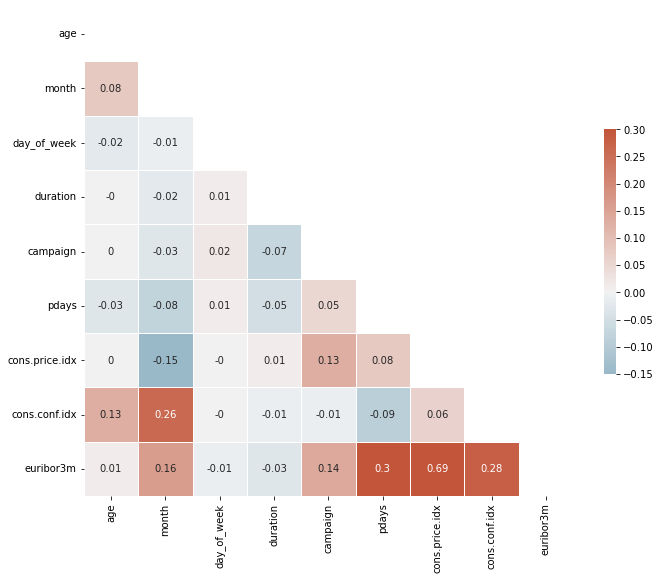

In [101]:
# Compute the correlation matrix
corr = bank.corr().round(2)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [102]:
bank_dummies = pd.get_dummies(bank, drop_first=True)
bank_dummies

,age,month,day_of_week,duration,campaign,pdays,cons.price.idx,cons.conf.idx,euribor3m,job_blue-collar,...,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,poutcome_nonexistent,poutcome_success,y_yes
0,56,5,1,261,1,999,93.994,-36.4,4.857,0,...,0,0,0,0,0,0,1,1,0,0
1,57,5,1,149,1,999,93.994,-36.4,4.857,0,...,1,0,0,0,0,0,1,1,0,0
2,37,5,1,226,1,999,93.994,-36.4,4.857,0,...,0,0,0,1,0,0,1,1,0,0
3,40,5,1,151,1,999,93.994,-36.4,4.857,0,...,0,0,0,0,0,0,1,1,0,0
4,56,5,1,307,1,999,93.994,-36.4,4.857,0,...,0,0,0,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,11,5,334,1,999,94.767,-50.8,1.028,0,...,0,0,0,1,0,0,0,1,0,1
41184,46,11,5,383,1,999,94.767,-50.8,1.028,1,...,0,0,0,0,0,0,0,1,0,0
41185,56,11,5,189,2,999,94.767,-50.8,1.028,0,...,0,0,0,1,0,0,0,1,0,0
41186,44,11,5,442,1,999,94.767,-50.8,1.028,0,...,0,0,0,0,0,0,0,1,0,1


Step 2. List your features

In [103]:
x = bank_dummies.drop('y_yes', axis = 1)
y = bank_dummies['y_yes']

Step 3. Apply the RandomForestClassifier and LogisticRegression model with default parameters to your data 
What is the accuracy for your models?

In [104]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [106]:
def generate_results(model, predictions, name):
    cl_rep = classification_report(y_test, predictions)
    print("\nThe classification report for " + name + " is:", cl_rep, sep = "\n")
    cm_model = confusion_matrix(y_test, predictions)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm_model, annot = True, cmap = 'Blues', annot_kws = {'size': 15}, square = True)
    plt.title('Confusion Matrix for ' + name, size = 15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show() 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

The accuracy of the Random Forest Classifier is: 91.32070890992959 %

The classification report for Random Forest Classifier is:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7303
           1       0.65      0.50      0.57       935

    accuracy                           0.91      8238
   macro avg       0.80      0.73      0.76      8238
weighted avg       0.91      0.91      0.91      8238



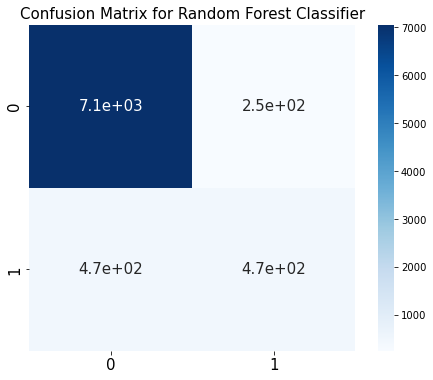

In [107]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
acc_rfc = rfc.score(x_test, y_test)
print('The accuracy of the Random Forest Classifier is:', acc_rfc * 100, '%')
generate_results(rfc, y_pred, 'Random Forest Classifier')

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

LR = LogisticRegression()
# fit it
LR.fit(x_train,y_train)
# test it and predict it
prediction_l=LR.predict(x_test)
print("The accuracy of the Logistic Regression is","{:.3f}".format(metrics.accuracy_score(prediction_l,y_test)))

The accuracy of the Logistic Regression is 0.910


C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Step 4. Select features using SelectFromModel method. Explain, how you define the optimal number of features


In [111]:
from sklearn.feature_selection import SelectFromModel

SFM = SelectFromModel(estimator=RandomForestClassifier())
s=SFM.fit(x_train,y_train)

In [112]:
n_features = s.transform(x_train).shape[1]

n_features

10

In [113]:
feature_idx = s.get_support()
feature_name = x_train.columns[feature_idx]
feature_name 

Index(['age', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'poutcome_success'],
      dtype='object')

In [116]:
selected_features = feature_name.to_list()
selected_features

['age',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'poutcome_success']


Step 5. Apply the RandomForestClassifier and LogisticRegression model with default parameters to your data (only selected features). What is the accuracy for your models?

In [117]:
bank_clean_dummy = bank_dummies[selected_features + ['y_yes']]

x_subset = bank_clean_dummy.drop('y_yes', axis = 1)
y_subset = bank_clean_dummy['y_yes']
x_subset_train, x_subset_test, y_subset_train, y_subset_test = train_test_split(x_subset, y_subset, test_size=0.2, random_state=42)

The accuracy of the Random Forest Classifier is: 90.92012624423404 %

The classification report for Random Forest Classifier is:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.61      0.54      0.57       935

    accuracy                           0.91      8238
   macro avg       0.78      0.75      0.76      8238
weighted avg       0.90      0.91      0.91      8238



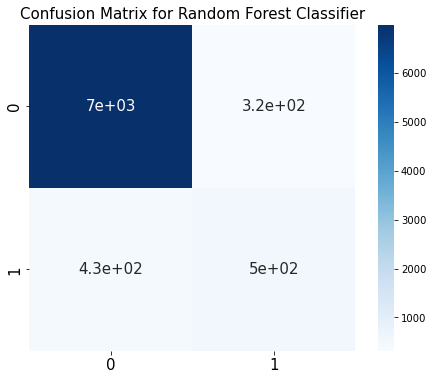

In [118]:
rfc = RandomForestClassifier()
rfc.fit(x_subset_train, y_subset_train)
y_subset_pred = rfc.predict(x_subset_test)
acc_rfc = rfc.score(x_subset_test, y_subset_test)
print('The accuracy of the Random Forest Classifier is:', acc_rfc * 100, '%')
generate_results(rfc, y_subset_pred, 'Random Forest Classifier')

In [119]:
from sklearn.metrics import confusion_matrix, accuracy_score

lr = LogisticRegression(random_state=42)
lr.fit(x_subset_train, y_subset_train)
y_subset_pred = lr.predict(x_subset_test)
print(f'Accuracy score: {accuracy_score(y_subset_test, y_subset_pred):.3f}')
print(confusion_matrix(y_subset_test, y_subset_pred))

Accuracy score: 0.910
[[7122  181]
 [ 560  375]]


C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Step 6. Select features using RFE and RFECV methods. Explain, how you define the optimal number of features for each of the cases.

In [120]:
from sklearn.feature_selection import RFE
rfe_selector = RFE(estimator=RandomForestClassifier(random_state=42),n_features_to_select = 7, step = 5, verbose = 1)
m=rfe_selector.fit(x_train, y_train)
rfe_selected_features = x_train.columns[m.get_support()].to_list()
print(rfe_selected_features)
print("Num Features: %s" % (m.n_features_))

Fitting estimator with 39 features.
Fitting estimator with 34 features.
Fitting estimator with 29 features.
Fitting estimator with 24 features.
Fitting estimator with 19 features.
Fitting estimator with 14 features.
Fitting estimator with 9 features.
['age', 'day_of_week', 'duration', 'campaign', 'pdays', 'cons.conf.idx', 'euribor3m']
Num Features: 7


In [128]:
from sklearn.feature_selection import RFECV


rfecv = RFECV(
    estimator=RandomForestClassifier(),
    min_features_to_select=3,
    step=5,
    n_jobs=-1,
    scoring="r2",
    cv=5,
)

m= rfecv.fit(x_train, y_train)
x_train.columns[rfecv.support_]

Index(['age', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'job_technician',
       'marital_married', 'marital_single', 'education_high.school',
       'education_university.degree', 'housing_yes', 'loan_yes',
       'contact_telephone', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [ ]:
m= rfecv.fit(x_train, y_train)
rfecv_selected_features = x_train.columns[m.get_support()].to_list()
print(rfecv_selected_features)
print("Num Features: %s" % (m.n_features_))

Step 7. Apply the RandomForestClassifier and LogisticRegression model with default parameters to your data (you will have 4 models, taking into account two sets of features that you got). What is the accuracy for your models?

In [131]:
bank_clean_dummy2 = bank_dummies[rfecv_selected_features + ['y_yes']]

x_subset2 = bank_clean_dummy2.drop('y_yes', axis = 1)
y_subset2 = bank_clean_dummy2['y_yes']
x_subset_train2, x_subset_test2, y_subset_train2, y_subset_test2 = train_test_split(x_subset2, y_subset2, test_size=0.2, random_state=42)


In [132]:
lr = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
lr.fit(x_subset_train2, y_subset_train2)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
y_pred2 = lr.predict(x_subset_test2)
print(accuracy_score(y_pred2,y_subset_test2))
print(confusion_matrix(y_pred2,y_subset_test2))

0.9095654285020636
[[7118  560]
 [ 185  375]]


C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(











Step 8. Please make the conclusion about the utility of the feature selection